# Module

In [1]:
import cv2 
import matplotlib.pyplot as plt 
from glob import glob

# Image path

In [39]:
# 사진 경로
image_paths = sorted(glob('./data/medical/img/train/*'))
image_paths[0]

'./data/medical/img/train/drp.en_ko.in_house.deepnatural_002411.jpg'

# CLAHE

In [26]:
# 사진 불러오기
src = cv2.imread(image_paths[0], cv2.IMREAD_COLOR)
# BGR to LAB
lab = cv2.cvtColor(src, cv2.COLOR_BGR2LAB)

In [27]:
# Split channel to l, a, b
l, a, b = cv2.split(lab)

In [28]:
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8, 8))

In [29]:
l = clahe.apply(l)

In [30]:
# Merge l, a, b
lab = cv2.merge((l, a, b))

In [31]:
# LAB to BGR
cont_dst = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

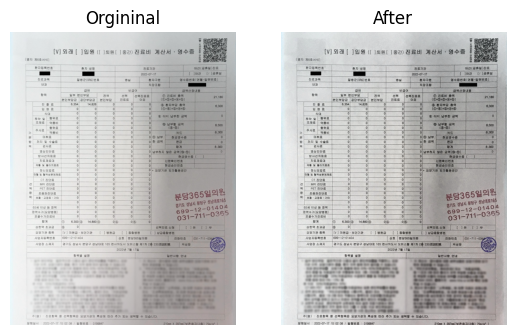

In [32]:
plt.figure()
plt.subplot(121)
plt.title('Orgininal')
plt.imshow(src)
plt.axis('off')

plt.subplot(122)
plt.title('After')
plt.imshow(cont_dst)
plt.axis('off')

plt.show()

# Create dataset

In [33]:
from tqdm import tqdm

In [34]:
# 저장 경로
save_dir = '/data/ephemeral/home/data/medical/img/clahe_train/'

In [44]:
# CLAHE function

def save_clahe_img(image_path:str):

    # 사진 이름
    name = image_path.split('/')[-1]

    # 사진 불러오기
    src = cv2.imread(image_path, cv2.IMREAD_COLOR)
    # BGR to LAB
    lab = cv2.cvtColor(src, cv2.COLOR_BGR2LAB)
    # Split channel to l, a, b
    l, a, b = cv2.split(lab)
    
    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8, 8))
    
    l = clahe.apply(l)

    # Merge l, a, b
    lab = cv2.merge((l, a, b))
    # LAB to BGR
    cont_dst = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    # 저장
    cv2.imwrite(save_dir+name,cont_dst)


In [46]:
for image_path in tqdm(image_paths):
    save_clahe_img(image_path)

100%|██████████| 100/100 [00:27<00:00,  3.60it/s]
